# MIE524 - Lab 3 - Locality Sensitive Hashing


## Quick intro to numpy
[NumPy](https://numpy.org/doc/stable/user/absolute_beginners.html) (Numerical Python) is an open source Python library. The NumPy library contains multidimensional array and matrix data structures. It provides ndarray, a homogeneous n-dimensional array object, with methods to efficiently operate on it.

In [ ]:
import numpy as np
rg = np.random.default_rng(1)

# let's create a numpy array
a = np.arange(15).reshape(3, 5)
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# print the shape of the array
a.shape

(3, 5)

In [ ]:
# print the numbe of axes in the array
a.ndim

2

In [ ]:
# print the type of values in the array
a.dtype.name

'int64'

In [ ]:
# print the the size in bytes of each element of the array
a.itemsize


8

In [ ]:
# print the total number of elements in the array
a.size

15

In [ ]:
# print the type of a, which is a numpy ndarray
type(a)

numpy.ndarray

In [ ]:
# let's look at the type of another array
b = np.array([6, 7, 8])
print(b)
print(type(b))

[6 7 8]
<class 'numpy.ndarray'>


### NumPy basic operations

In [ ]:
a = np.array([20, 30, 40, 50])
b = np.arange(4)
b

array([0, 1, 2, 3])

In [ ]:
c = a - b
c

array([20, 29, 38, 47])

In [ ]:
b**2

array([0, 1, 2, 3])

In [ ]:
10 * np.sin(a)

array([ 9.12945251, -9.88031624,  7.4511316 , -2.62374854])

In [ ]:
a < 35

array([ True,  True, False, False])

### Indexing, Slicing and Iterating

In [ ]:
a = np.arange(10)**3
a

array([  0,   1,   8,  27,  64, 125, 216, 343, 512, 729])

In [ ]:
a[2]

8

In [ ]:
a[2:5]

array([ 8, 27, 64])

In [ ]:
# equivalent to a[0:6:2] = 1000;
# from start to position 6, exclusive, set every 2nd element to 1000
a[:6:2] = 1000
a

array([1000,    1, 1000,   27, 1000,  125,  216,  343,  512,  729])

In [ ]:
a[::-1]  # reversed a

array([ 729,  512,  343,  216,  125, 1000,   27, 1000,    1, 1000])

### Changing the shape

In [ ]:
a = np.floor(10 * rg.random((3, 4)))
a

array([[5., 9., 1., 9.],
       [3., 4., 8., 4.],
       [5., 0., 7., 5.]])

In [ ]:
a.shape

(3, 4)

In [ ]:
a.ravel()  # returns the array, flattened

array([5., 9., 1., 9., 3., 4., 8., 4., 5., 0., 7., 5.])

In [ ]:
a.reshape(6, 2)  # returns the array with a modified shape

array([[5., 9.],
       [1., 9.],
       [3., 4.],
       [8., 4.],
       [5., 0.],
       [7., 5.]])

In [ ]:
a.T  # returns the array, transposed

array([[5., 3., 5.],
       [9., 4., 0.],
       [1., 8., 7.],
       [9., 4., 5.]])

In [ ]:
a.T.shape

(4, 3)

## Principal Component Analysis (PCA)
Dimensionality reduction

### Data Preparation

In [4]:
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()
breast_data = breast.data
breast_data.shape

(569, 30)

In [5]:
breast_labels = breast.target

In [6]:
import numpy as np

labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data,labels],axis=1)

In [7]:
import pandas as pd

breast_dataset = pd.DataFrame(final_breast_data)

In [8]:
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
# add headings to the dataframe
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [10]:
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)

breast_dataset.tail()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


### Apply PCA and vizualize data

In [11]:
from sklearn.preprocessing import StandardScaler
x = breast_dataset.loc[:, features].values
x = StandardScaler().fit_transform(x) # normalizing the features


In [12]:
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

normalised_breast = pd.DataFrame(x,columns=feat_cols)
normalised_breast.tail()


,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,...,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [13]:
from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])

principal_breast_Df.tail()


,principal component 1,principal component 2
564,6.439315,-3.576817
565,3.793382,-3.584048
566,1.256179,-1.902297
567,10.374794,1.672010
568,-5.475243,-0.670637


<Figure size 640x480 with 0 Axes>

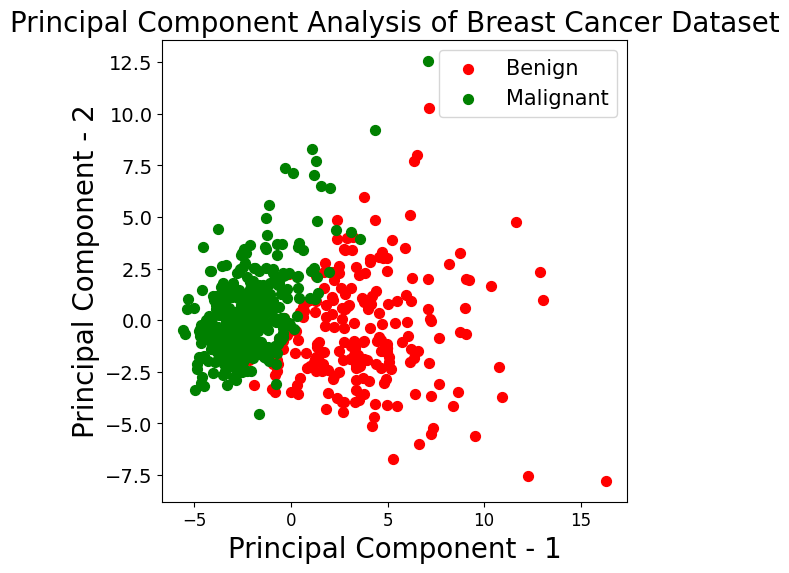

In [14]:
import matplotlib.pyplot as plt

plt.figure()
plt.figure(figsize=(6,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})


## Clustering -- KMeans
Using Scikit-learn, we will look at the digits dataset. This dataset contains handwritten digits from 0 to 9. In the context of clustering, one would like to group images such that the handwritten digits on the image are the same.


In [15]:
import numpy as np
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}")

# digits: 10; # samples: 1797; # features 64


In [16]:
from time import time
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


def bench_k_means(kmeans, name, data, labels):
    """Benchmark to evaluate the KMeans initialization methods.

    Parameters
    ----------
    kmeans : KMeans instance
        A :class:`~sklearn.cluster.KMeans` instance with the initialization
        already set.
    name : str
        Name given to the strategy. It will be used to show the results in a
        table.
    data : ndarray of shape (n_samples, n_features)
        The data to cluster.
    labels : ndarray of shape (n_samples,)
        The labels used to compute the clustering metrics which requires some
        supervision.
    """
    t0 = time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Define the metrics which require only the true labels and estimator
    # labels
    clustering_metrics = [
        metrics.homogeneity_score,
        metrics.completeness_score,
        metrics.v_measure_score,
        metrics.adjusted_rand_score,
        metrics.adjusted_mutual_info_score,
    ]
    results += [m(labels, estimator[-1].labels_) for m in clustering_metrics]

    # The silhouette score requires the full dataset
    results += [
        metrics.silhouette_score(
            data,
            estimator[-1].labels_,
            metric="euclidean",
            sample_size=300,
        )
    ]

    # Show the results
    formatter_result = (
        "{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}"
    )
    print(formatter_result.format(*results))

In [17]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

print(82 * "_")
print("init\t\ttime\tinertia\thomo\tcompl\tv-meas\tARI\tAMI\tsilhouette")

kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="k-means++", data=data, labels=labels)

kmeans = KMeans(init="random", n_clusters=n_digits, n_init=4, random_state=0)
bench_k_means(kmeans=kmeans, name="random", data=data, labels=labels)

pca = PCA(n_components=n_digits).fit(data)
pca_data = pca.transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=1)
bench_k_means(kmeans=kmeans, name="PCA-based", data=pca_data, labels=labels)

print(82 * "_")

__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	1.783s	69662	0.680	0.719	0.699	0.570	0.695	0.184
random   	0.296s	69707	0.675	0.716	0.694	0.560	0.691	0.173
PCA-based	0.020s	9175	0.727	0.731	0.729	0.664	0.727	0.267
__________________________________________________________________________________


### Visualize the results on PCA-reduced data

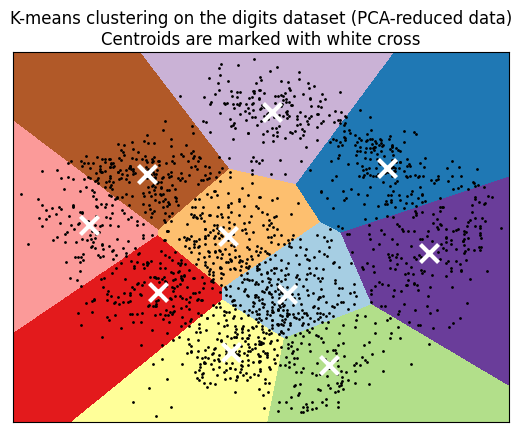

In [18]:
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

## Hashing functions

### Python's built in Hash() function.
Python hash() function is a built-in function and returns the hash value of an object if it has one. The hash value is an integer which is used to quickly compare dictionary keys while looking at a dictionary.

In [19]:
# initializing objects
int_val = 5
str_val = 'DataMining'
flt_val = 52.42

# Printing the hash values.
# Notice Integer value doesn't change
# You'll have answer later in article.
print("The integer hash value is : " + str(hash(int_val)))
print("The string hash value is : " + str(hash(str_val)))
print("The float hash value is : " + str(hash(flt_val)))

The integer hash value is : 5
The string hash value is : -8860248721589992894
The float hash value is : 968454063869755444


### Custom hashing functions

*   **Hash table** is a collection of elements which are stored in such a way as to make it easy to find them when we need.
*   Initially, the hash table contains no element so every slot is **empty**.
* Each position of the hash table, slots, can hold an element and is named by an integer( index ) value starting at 0. For example, we will have a slot named 0, a slot named 1, a slot named 2, and so on.

The mapping between an element and the slot where that element belongs in the hash table is called the **hash function**.


#### Remainder method
The hash function is the element divided by the table size, this is then its slot number (Index).

![remainder](https://faculty.cs.niu.edu/~freedman/340/340notes/gifImages/340hash2.gif)

In [ ]:
class HashTable(object):

    def __init__(self,size):

        # We set up size and slots and data
        self.size = size
        self.slots = [None] * self.size
        self.data = [None] * self.size

    def put(self,key,data):

        # We get the hash value
        hashvalue = self.hashfunction(key,len(self.slots))

        # in case Slot is Empty
        if self.slots[hashvalue] == None:
            self.slots[hashvalue] = key
            self.data[hashvalue] = data

        else:

            # If the key already exists, replace old value
            if self.slots[hashvalue] == key:
                self.data[hashvalue] = data

            # Otherwise, find the next available slot - collision case
            else:

                nextslot = self.rehash(hashvalue,len(self.slots))

                # Get to the next slot
                while self.slots[nextslot] != None and self.slots[nextslot] != key:
                    nextslot = self.rehash(nextslot,len(self.slots))

                # Set new key, if NONE
                if self.slots[nextslot] == None:
                    self.slots[nextslot]=key
                    self.data[nextslot]=data

                # Otherwise replace old value
                else:
                    self.data[nextslot] = data

    def hashfunction(self,key,size):
        # Remainder Method
        return key%size

    def rehash(self,oldhash,size):
        # For finding next possible positions
        return (oldhash+1)%size


    def get(self,key):

        # Get the  items given a key

        # Set up variables for our search
        startslot = self.hashfunction(key,len(self.slots))
        data = None
        stop = False
        found = False
        position = startslot

        # Until we discern that its not empty or found (and haven't stopped yet)
        while self.slots[position] != None and not found and not stop:

            if self.slots[position] == key:
                found = True
                data = self.data[position]

            else:
                position=self.rehash(position,len(self.slots))
                if position == startslot:

                    stop = True
        return data

    # Special Methods for use with Python indexing
    def __getitem__(self,key):
        return self.get(key)

    def __setitem__(self,key,data):
        self.put(key,data)


In [ ]:
h = HashTable(5)

h[1] = 'twenty one'
h[2] = 'twenty two'

In [ ]:
print(h[1])

twenty one


In [ ]:
h.slots

[None, 1, 2, None, None]

In [ ]:
h.data

[None, 'twenty one', 'twenty two', None, None]

In [ ]:
h[10] = 'thirty'

In [ ]:
h.slots

[10, 1, 2, None, None]

In [ ]:
h.data

['thirty', 'twenty one', 'twenty two', 'fourty', None]

In [ ]:
h[20] = 'fourty'

In [ ]:
h.slots


[10, 1, 2, 20, None]

In [ ]:
h.data

['thirty', 'twenty one', 'twenty two', 'fourty', None]

In [ ]:
class MyNum:
  def __init__(self, n):
    self.num = n

  def __hash__(self):
    return self.num % 2
    # return self.num

  def __eq__(self, other):
    #return self.__hash__() == other.__hash__()
    return self.num == other.num

In [ ]:
d = {}

# d[MyNum(5)] = "five"
# d[MyNum(7)] = "seven"
for i in range(1, 20000):
  d[MyNum(i)] = "Number {}".format(i)

# d[MyNum(5)],d[MyNum(7)]

In [ ]:
%%timeit
d[MyNum(5)]


913 ns ± 312 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
class RegNum:
  def __init__(self, n):
    self.num = n

  def __hash__(self):
    # return self.num % 2
    return self.num

  def __eq__(self, other):
    #return self.__hash__() == other.__hash__()
    return self.num == other.num

In [ ]:
dreg = {}

# d[MyNum(5)] = "five"
# d[MyNum(7)] = "seven"
for i in range(1, 20000):
  dreg[RegNum(i)] = "Number {}".format(i)

# d[MyNum(5)],d[MyNum(7)]

In [ ]:
%%timeit
dreg[RegNum(5)]


1.73 µs ± 249 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
